In [2]:
%matplotlib inline
# %matplotlib notebook
import os;
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# For 3d plot
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# very limited information when exception is caught
%xmode Plain
# %pdb on or %ipdb on # enable debugger when exception occurred

Exception reporting mode: Plain


In [35]:
# https://scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/
def magic(N):
    magic_square = np.zeros((N,N), dtype=int)

    n = 1
    i, j = 0, N//2

    while n <= N**2:
        magic_square[i, j] = n
        n += 1
        newi, newj = (i-1) % N, (j+1)% N
        if magic_square[newi, newj]:
            i += 1
        else:
            i, j = newi, newj

    return (magic_square)

In [14]:
path = os.getcwd()+'/data/ex2data1.txt';
data = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head(5)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
data['Admitted'].head(5)

0    0
1    0
2    0
3    1
4    1
Name: Admitted, dtype: int64

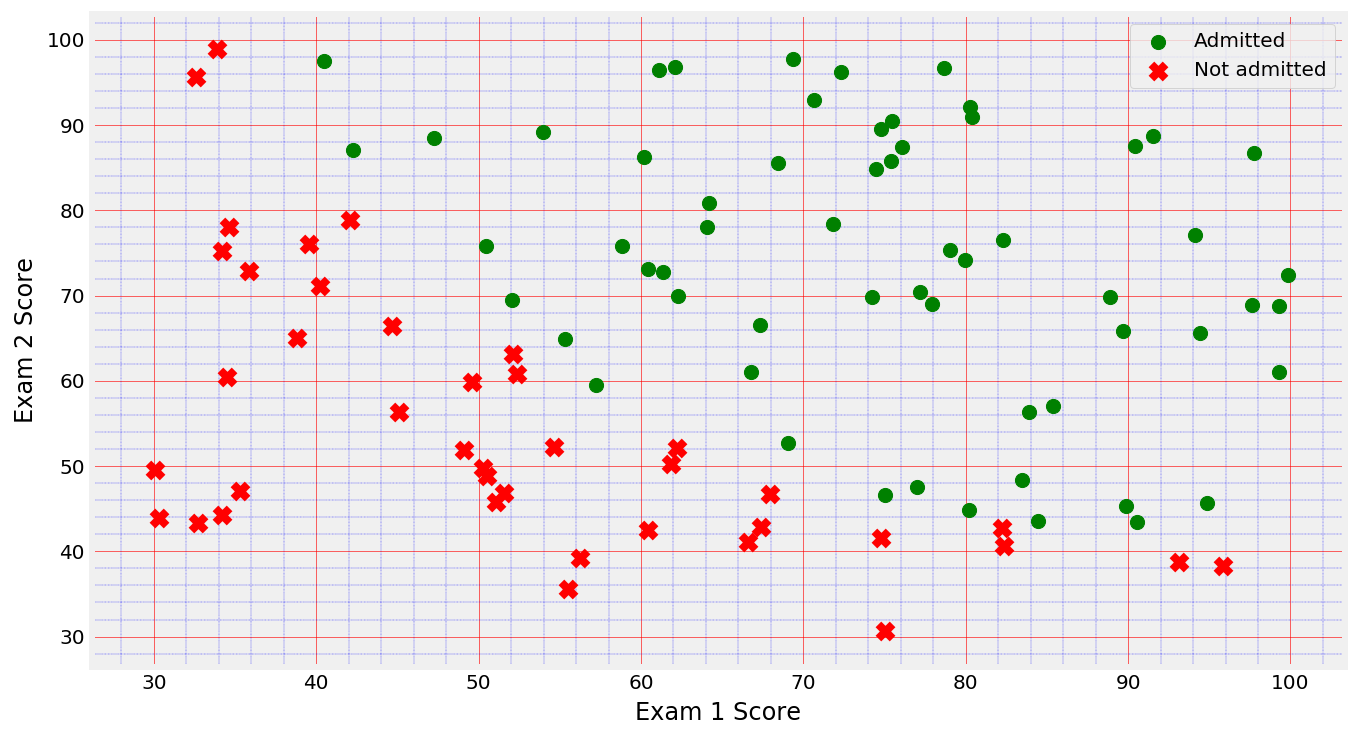

In [15]:
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = pos['Exam 1'], y = pos['Exam 2'], s=50, c = 'g', marker = 'o', label = 'Admitted')
ax.scatter(x = neg['Exam 1'], y = neg['Exam 2'], s=50, c = 'r', marker = 'x', label = 'Not admitted' )
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(loc = 1)
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both') # turn off bottom ticks

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
sigmoid(0)

0.5

In [18]:
data.insert(0, 'Ones', 1)
data.head(5)

In [20]:
cols = data.shape[1]

In [26]:
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1 : cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
X.shape, y.shape

((100, 3), (100, 1))

In [66]:
def costFunction(theta, X, y):
    m = X.shape[0]
    z = X * theta.T
    _hypothesis = sigmoid(z)
    print(_hypothesis.shape)
    pos = (-y * np.log(_hypothesis))
    neg = ((1 - y) * (1 - np.log(_hypothesis)))
    _sub = pos - neg
    J = (1 / m) * np.sum(_sub)
    return J

In [71]:
_X = np.asmatrix(magic(3))
_X = np.insert(_X, 0, 1, axis=1)
_theta = np.matrix(np.zeros(4))
_y = np.matrix([1, 0, 1]).T
_X.shape, _y.shape, _theta.shape

((3, 4), (3, 1), (1, 4))

In [72]:
_J = costFunction(_theta, _X, _y)
_J

(3, 1)


ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

In [70]:
theta = np.matrix(np.zeros(3))
J = costFunction(theta, X, y)
J

(100, 1)


ValueError: shapes (100,1) and (100,1) not aligned: 1 (dim 1) != 100 (dim 0)